In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

In [2]:
data_duplicates = pd.read_csv(r'apps.csv')

In [3]:
data_duplicates.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps = data_duplicates.drop_duplicates()
print("Total numbers of Apps : ", apps[ 'App' ].count())
apps.head()

Total numbers of Apps :  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ch_remove = ('+' , '$' , 'M' , ',' )
col_clean = ('Size','Installs','Price')
for col in col_clean:
    for char in ch_remove:
        apps[col] = apps[col].str.replace(char, '')
    apps[col] = pd.to_numeric(apps[col])

In [6]:
n_categories = len(set(apps['Category']))
print('Number of categories = ', n_categories)
n_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
data1 = go.Bar(
    x = n_apps_in_category.index,
    y = n_apps_in_category.values
)
fig = go.Figure(data1)
fig.show()

Number of categories =  33


In [7]:
print("Avarage App rating = ", apps['Rating'].mean())

Avarage App rating =  4.173243045387994


In [8]:
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]
avg_rating = apps['Rating'].mean()
# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_rating,
              'y0': 0,
              'x1': avg_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({'data': data, 'layout': layout})

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


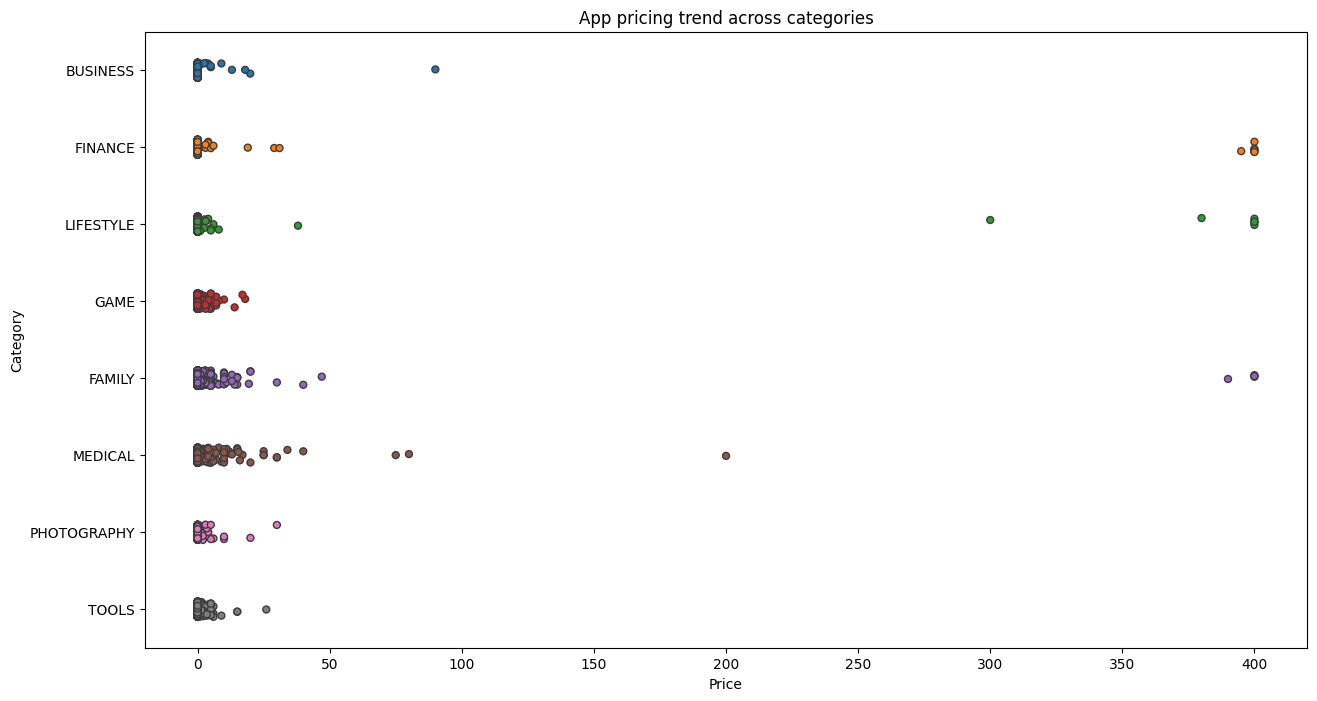

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]
ax = sns.stripplot(x='Price', y='Category', data = popular_app_cats,  jitter=True, linewidth=1, hue='Category')
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

In [11]:
tr0 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)
tr1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
data = [tr0, tr1]
plotly.offline.iplot({'data': data, 'layout': layout})